# Introducción a NumPy

Parte de la serie de conferencias Quantopian:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

Cuaderno publicado bajo la licencia Creative Commons Attribution 4.0.

NumPy es un paquete increíblemente poderoso en Python que es ubicuo en toda la plataforma cuántica. Tiene una fuerte integración con Pandas, otra herramienta que cubriremos en la serie de conferencias. NumPy agrega soporte para matrices multidimensionales y funciones matemáticas que le permiten realizar fácilmente cálculos de álgebra lineal. Esta conferencia será una colección de ejemplos de álgebra lineal calculada usando NumPy.

In [1]:
# librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt

# Arrays básicos de NumPy

La forma más básica en que podemos usar NumPy en finanzas es calcular la rentabilidad media de una cartera. Digamos que tenemos una lista que contiene el rendimiento histórico de varias acciones.

In [2]:
stock_list = [3.5, 5, 2, 8, 4.2]
print stock_list

[3.5, 5, 2, 8, 4.2]


Podemos hacer una matriz llamando a una función en la lista:

In [4]:
# crea la matriz
returns = np.array(stock_list)
print returns, type(returns)

[ 3.5  5.   2.   8.   4.2] <type 'numpy.ndarray'>


Notarás que el tipo de nuestra matriz es 'ndarray', no solo 'array'. Esto se debe a que las matrices NumPy se pueden crear con múltiples dimensiones. Si pasamos np.array () una lista de listas, creará una matriz bidimensional. Si pasamos una lista de listas, creará una matriz tridimensional, y así sucesivamente.

In [6]:
# matriz de 2x2
A = np.array([[1, 2], [3, 4]])
print A, type(A)

[[1 2]
 [3 4]] <type 'numpy.ndarray'>


Podemos acceder a las dimensiones de una matriz mirando su variable de miembro de forma.

In [8]:
# tamaño de la matriz
print A.shape

(2, 2)


Las matrices están indexadas casi de la misma manera que las listas en Python. Los elementos de una lista comienzan a indexarse desde 0 y terminan en n-1, donde n es la longitud de la matriz.

In [10]:
# retorna el indice 0 y len() - 1
print returns[0], returns[len(returns) - 1]

3.5 4.2


Podemos tomar una porción de una matriz usando dos puntos, como en una lista.

In [12]:
# toma desde la posicion 1 hasta la 3
print returns[1:3]

[ 5.  2.]


Una porción de una matriz, como en una lista, seleccionará un grupo de elementos en la matriz a partir del primer elemento indicado y subiendo (pero sin incluir) al último elemento indicado.

En el caso de matrices multidimensionales, muchas de las mismas convenciones con segmentación y segmentación se mantienen. Podemos acceder a la primera columna de una matriz bidimensional de la siguiente manera:

In [13]:
# accedemos a la columna 0 de la matriz
print A[:, 0]

[1 3]


Y la primera fila de una matriz bidimensional así:

In [14]:
# accedemos a la fila 0 de la matriz
print A[0, :]

[1 2]


¡Observe que cada porción de la matriz devuelve otra matriz!

In [16]:
# elemento de tipo matriz
print type(A[0,:])

<type 'numpy.ndarray'>


Pasar solo un índice a una matriz bidimensional dará como resultado la devolución de la fila con el índice dado también, lo que nos brindará otra forma de acceder a las filas individuales.

In [17]:
# fila 0
print A[0]

[1 2]


El acceso al índice de un elemento individual devolverá solo el elemento.

In [18]:
# accdemos al elemento de la fila 1 y columna 1
print A[1, 1]

4


# Funciones Array

Las funciones integradas en NumPy se pueden invocar fácilmente en las matrices. La mayoría de las funciones se aplican a un conjunto de elementos (como es la multiplicación escalar). Por ejemplo, si llamamos a log () en una matriz, se tomará el logaritmo de cada elemento.t.

In [20]:
# logaritmo de cada elemento
print np.log(returns)

[ 1.25276297  1.60943791  0.69314718  2.07944154  1.43508453]


Algunas funciones devuelven un solo valor. Esto se debe a que tratan la matriz como una colección (similar a una lista), realizando la función designada. Por ejemplo, la función mean () hará exactamente lo que espera, calculando la media de una matriz.

In [21]:
# calcula la media
print np.mean(returns)

4.54


O la función max () devolverá el elemento máximo de una matriz.

In [22]:
# calcula el maximo de los elementos
print np.max(returns)

8.0


Para obtener más información sobre las funciones universales en NumPy, consulte la documentación. [documentation](https://docs.scipy.org/doc/numpy/user/quickstart.html#universal-functions).

# Retorno a los retornos

Ahora modifiquemos nuestra matriz de devoluciones con valores escalares. Si agregamos un valor escalar a una matriz, se agregará a cada elemento de la matriz. Si multiplicamos una matriz por un valor escalar, se multiplicará contra cada elemento de la matriz. Si hacemos ambas cosas, ¡ambas sucederán!

In [24]:
# multiplica la matriz x 2 y le suma 5
returns*2 + 5

array([ 12. ,  15. ,   9. ,  21. ,  13.4])

NumPy también tiene funciones específicamente diseñadas para operar en arreglos. Tomemos la media y la desviación estándar de este grupo de declaraciones.

In [25]:
# calcula la media (mean) y la desviacion estandar (std)
print "Mean: ", np.mean(returns), "Std Dev: ", np.std(returns)

Mean:  4.54 Std Dev:  1.99158228552


Simulemos un universo de acciones usando las funciones de NumPy. Primero necesitamos crear las matrices para mantener los activos y devoluciones que usaremos para construir una cartera. Esto se debe a que las matrices se crean con un tamaño fijo. Sus dimensiones no se pueden cambiar sin crear una nueva matriz.

In [31]:
# creamos una matriz de 10 x 100 (2 dimensiones)
N = 10
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))
print "matriz assets: " , assets
print "\nmatriz returns: " , returns

matriz assets:  [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0. 

Esta función, zeros (), crea una matriz NumPy con las dimensiones proporcionadas que se completa por completo con 0. Podemos pasar un solo valor o una tupla de tantas dimensiones como queramos. Al pasar en la tupla (N, 100), se devolverá una matriz bidimensional con N filas y 100 columnas. Nuestro resultado es una matriz N × 100.

Ahora simularemos un activo base. Queremos que el universo de acciones esté correlacionado entre sí, por lo que usaremos este valor inicial para generar los demás.

In [35]:
# 100 muestras aleatorias
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)
print(returns[0])
print(assets[0])

[ 1.00772572  0.97582668  1.05155534  1.02415066  1.04969478  0.98917412
  0.99816589  1.03564818  0.98786783  1.05479515  1.01359273  0.9673109
  1.03068849  0.99968853  1.01502023  1.00928493  1.01127247  1.04379576
  1.02402223  1.03035192  0.95253515  1.04349375  0.96120038  1.00638712
  0.97990298  0.99363718  1.02152695  0.97978272  1.00175976  1.07311132
  1.02588979  1.00894729  1.00267432  0.98548762  0.98975955  1.01109451
  0.99625137  0.99744456  0.97858998  0.98399249  0.99407211  0.99624306
  1.00667656  0.99217502  1.02748143  0.96651951  1.02160516  1.00707678
  1.00686351  1.03289952  1.06655457  0.98646649  0.99945336  0.97528981
  0.99323598  1.01337337  1.00123929  0.98741482  1.0306494   1.05436932
  0.97848312  1.01880686  1.06211137  1.0123327   0.98230449  0.98726116
  1.05534118  1.01733192  0.9747344   1.00822829  1.04283917  1.00646088
  0.95999831  1.02275364  1.02151563  0.98606199  1.04036983  1.02912181
  0.98451214  0.97708685  0.91218146  1.03080599  1.

El módulo aleatorio en NumPy es extremadamente útil. Contiene métodos para el muestreo de muchas distribuciones de probabilidad diferentes, algunas de las cuales están cubiertas en la conferencia de variables aleatorias en la serie de conferencias cuánticas. En este caso, extraemos N = 100 muestras aleatorias de una distribución normal con una media de 1,01 y una desviación estándar de 0,03. Tratamos estos como los rendimientos porcentuales diarios de nuestro activo y tomamos el producto acumulado de estas muestras para obtener el precio actual. [random variables lecture](https://www.quantopian.com/lectures/random-variables)

La forma en que hemos generado nuestro universo, los vectores Ri individuales son cada uno matrices de 1 dimensión y las variables de devoluciones y activos contienen matrices de 2 dimensiones. Más arriba, establecemos la fila inicial de rendimientos y activos para que sea el primer vector de Ri y el precio de activo acumulado en función de esos rendimientos, respectivamente.

Ahora usaremos este activo base para crear algunos otros activos aleatorios que estén correlacionados con él.

In [37]:
# Generar activos que están correlacionados con R_1
for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i # Establece cada fila de devoluciones igual a la nueva matriz R_i
    assets[i] = np.cumprod(R_i)
    
mean_returns = [(np.mean(R) - 1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]
print mean_returns
print return_volatilities

[0.62262631579133032, 0.46963141903533234, 0.67161430211468698, 1.0360653219471994, 0.57363797561176266, 0.88448730520880314, 0.81561293473706442, 0.67305800891213075, 0.44748971487209577, 0.54547057774834151]
[0.02848693729315498, 0.036704087555838316, 0.038542121161683353, 0.03451416787656629, 0.034393282649686538, 0.035646783532059842, 0.036859509497975854, 0.034779790862197971, 0.034375183051582069, 0.035651125627038205]


Aquí generamos los valores N-1 restantes que queremos en nuestro universo agregando ruido aleatorio a R1. Esto asegura que nuestros otros N-1 activos estarán correlacionados con el activo base porque tienen cierta información subyacente que se comparte.

Vamos a trazar el aspecto de la rentabilidad media de cada activo:

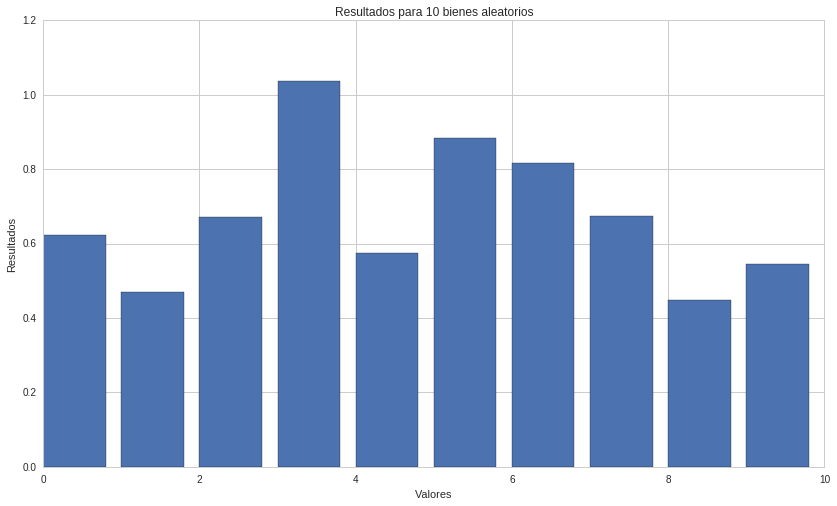

In [38]:
# grafica del activo
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Valores')
plt.ylabel('Resultados')
plt.title('Resultados para {0} bienes aleatorios'.format(N));

# Cálculo del retorno esperado

Entonces tenemos un universo de acciones. ¡Estupendo! Ahora vamos a juntarlos en una cartera y calcular su rendimiento y riesgo esperados.

Comenzaremos generando N pesos aleatorios para cada activo de nuestra cartera.

In [42]:
# generamos N pesos aleatorios para cada activo de nuestra cartera.
# tenemos que volver a escalar los pesos para que todos sumen hasta 1.
# hacemos esto escalando el vector de ponderaciones por la suma total
# de todos los pesos. Este paso asegura que utilizaremos el 100% del
# efectivo de la cartera.
weights = np.random.uniform(0, 1, N)
print weights
weights = weights/np.sum(weights)
print weights

[ 0.43728593  0.78278073  0.20229676  0.8660751   0.19751098  0.26320207
  0.42659393  0.10769903  0.91458221  0.54247263]
[ 0.0922447   0.16512622  0.04267414  0.18269702  0.04166459  0.05552201
  0.08998924  0.02271892  0.19292951  0.11443365]


Tenemos que volver a escalar los pesos para que todos sumen hasta 1. Hacemos esto escalando el vector de ponderaciones por la suma total de todos los pesos. Este paso asegura que utilizaremos el 100% del efectivo de la cartera.

Para calcular la rentabilidad media de la cartera, tenemos que escalar el rendimiento de cada activo por su peso designado. Podemos extraer cada elemento de cada matriz y multiplicarlos individualmente, pero es más rápido usar los métodos de álgebra lineal de NumPy. La función que queremos es dot (). Esto calculará el producto escalar entre dos arreglos para nosotros. Entonces si $v = \left[ 1, 2, 3 \right]$ y $w = \left[4, 5, 6 \right]$, entonces:

$$ v \cdot w = 1 \times 4 + 2 \times 5 + 3 \times 6 $$

Para un vector unidimensional, el producto de puntos multiplicará cada elemento de manera puntual y agregará todos los productos. En nuestro caso, tenemos un vector de pesos, $\omega = \left[ \omega_1, \omega_2, \dots \omega_N\right]$ y un vector de retornos, $\mu = \left[ \mu_1, \mu_2, \dots, \mu_N\right]$. Si tomamos el producto escalar de estos dos obtendremos:

$$ \omega \cdot \mu = \omega_1\mu_1 + \omega_2\mu_2 + \dots + \omega_N\mu_N = \mu_P $$

Esto produce la suma de todos los rendimientos de activos escalados por sus respectivos pesos. ¡Este es el rendimiento esperado general de la cartera!

In [43]:
# calcula el producto escalar entre dos arreglos (producto punto)
# suma de todos los rendimientos de activos escalados por sus respectivos pesos
p_returns = np.dot(weights, mean_returns)
print "Retorno esperado de la cartera: ", p_returns

Retorno esperado de la cartera:  0.66337965345


El cálculo de la rentabilidad media es bastante intuitivo y no requiere demasiada explicación del álgebra lineal. Sin embargo, calcular la varianza de nuestra cartera requiere un poco más de antecedentes.

# Cuidado con los valores de NaN

La mayoría de las veces, todos estos cálculos funcionarán sin problemas. Sin embargo, cuando trabajamos con datos reales, corremos el riesgo de tener valores nan en nuestras matrices. Esta es la manera en que NumPy dice que los datos que faltan o no existen. Estos valores nan pueden llevar a errores en los cálculos matemáticos, por lo que es importante saber si su matriz contiene valores nan y saber cómo soltarlos.

In [46]:
# nan: datos que faltan o no existen
v = np.array([1, 2, np.nan, 4, 5])
print v

[  1.   2.  nan   4.   5.]


Veamos qué sucede cuando tratamos de tomar la media de esta matriz.

In [47]:
# al calcular la media nos aparece nan
print np.mean(v)

nan


Claramente, los valores nan pueden tener un gran impacto en nuestros cálculos. Afortunadamente, podemos verificar valores nan con la función isnan ().

In [48]:
# verificar valores nan con la función isnan ().
np.isnan(v)

array([False, False,  True, False, False], dtype=bool)

Llamar a isnan () en una matriz llamará a la función en cada valor de la matriz, devolviendo un valor de Verdadero si el elemento es nan y Falso si el elemento es válido. Ahora, saber si su matriz contiene valores de nan está todo bien, pero ¿cómo eliminamos nans? Fácilmente, las matrices NumPy pueden indexarse por valores booleanos (verdadero o falso). Si usamos una matriz booleana para indexar una matriz, eliminaremos todos los valores de la matriz que se registre como False bajo esta condición. Usamos la función isnan () en crear una matriz booleana, asignando un valor True a todo lo que no es nan y un False a los nans y lo usamos para indexar la misma matriz.

In [49]:
# el ~ indica un no lógico, invirtiendo los bools
ix = ~np.isnan(v) 
print v[ix] # También podemos simplemente escribir v = v [~ np.isnan (v)]

[ 1.  2.  4.  5.]


In [50]:
# calculando la media, vemos que no aparece nan
print np.mean(v[ix])

3.0


Hay algunos accesos directos a este proceso en forma de funciones NumPy específicamente construidas para manejarlos, como nanmean ().

In [29]:
print np.nanmean(v)

3.0


La función nanmean () simplemente calcula la media de la matriz como si no hubiera valores nan en absoluto. Hay algunas más de estas funciones, así que no dude en leer más sobre ellas en la documentación. Estos valores indeterminados son más un problema con los datos que el álgebra lineal en sí misma, por lo que es útil que haya formas de manejarlos.

# Conclusión

El álgebra lineal es omnipresente en las finanzas y en general. Por ejemplo, el cálculo de las ponderaciones óptimas de acuerdo con la teoría de la cartera moderna se realiza utilizando técnicas de álgebra lineal. Las matrices y las funciones en NumPy nos permiten manejar estos cálculos de una manera intuitiva. Para una introducción rápida al álgebra lineal y cómo usar NumPy para hacer cálculos de matriz más significativos, pase a la siguiente sección.

# Una breve incursión en el álgebra lineal

Comencemos con una descripción básica de algunos conceptos de álgebra lineal. El álgebra lineal se reduce a la multiplicación y composición de valores escalares y de matriz. Un valor escalar es solo un número real que multiplicamos contra una matriz. Cuando escalamos una matriz o matriz usando un escalar, multiplicamos cada elemento individual de esa matriz o matriz por el escalar.

Una matriz es una colección de valores, típicamente representada por una cuadrícula de m × n, donde m es el número de filas y n es el número de columnas. Las longitudes de los bordes m y n no tienen que ser necesariamente diferentes. Si tenemos m = n, llamamos a esto una matriz cuadrada. Un caso particularmente interesante de una matriz es cuando m = 1 o n = 1. En este caso, tenemos un caso especial de una matriz que llamamos vector. Si bien hay un objeto de matriz en NumPy, haremos todo con matrices NumPy porque pueden tener dimensiones superiores a 2. Para el propósito de esta sección, usaremos matriz y matriz de forma intercambiable.

Podemos expresar la ecuación matricial como:

$$ y = A\cdot x $$

Donde A es una matriz m × n, y es un vector m × 1, y x es un vector n × 1. En el lado derecho de la ecuación estamos multiplicando una matriz por un vector. Esto requiere un poco más de aclaración, no sea que pensemos que podemos multiplicar cualquier matriz por cualquier otra matriz.

# Multiplicación de matrices

Con la multiplicación de matrices, importa el orden en que se multiplican las matrices. Multiplicar una matriz en el lado izquierdo por otra matriz puede estar bien, pero la multiplicación en la derecha puede no estar definida.

In [51]:
A = np.array([
        [1, 2, 3, 12, 6],
        [4, 5, 6, 15, 20],
        [7, 8, 9, 10, 10]        
    ])
B = np.array([
        [4, 4, 2],
        [2, 3, 1],
        [6, 5, 8],
        [9, 9, 9]
    ])

Observe que las matrices definidas anteriormente, A y B, tienen diferentes dimensiones. A es 3 × 5 y B es 4 × 3. La regla general de lo que se puede y no se puede multiplicar, en qué orden se basa en las dimensiones de las matrices. Específicamente, el número de columnas en la matriz de la izquierda debe ser igual al número de filas en la matriz de la derecha. En términos super informales, digamos que tenemos una matriz m × n y una matriz p × q. Si multiplicamos el primero por el segundo a la derecha, obtenemos lo siguiente:

$$ (m \times n) \cdot (p \times q) = (m \times q) $$

De modo que el producto resultante tiene el mismo número de filas que la matriz izquierda y el mismo número de columnas que la matriz derecha. Esta limitación de la multiplicación de la matriz con respecto a las dimensiones es importante para realizar un seguimiento de cuándo se escribe el código. Para demostrar esto, usamos la función punto () para multiplicar nuestras matrices a continuación:

In [52]:
# al multiplicar AXB nos aparecerá error, pues sus matrices deben ser cuadradas
# (3 X 5) X (4 X 3)
print np.dot(A, B)

ValueError: shapes (3,5) and (4,3) not aligned: 5 (dim 1) != 4 (dim 0)

Estos resultados tienen sentido de acuerdo con nuestra regla. Multiplicar una matriz de 3 × 5 a la derecha por una matriz de 4 × 3 da como resultado un error, mientras que multiplicar una matriz de 4 × 3 a la derecha por una matriz de 3x5 da como resultado una matriz de 4x5.

In [53]:
# al multiplicar B X A, cumple la propiedad de tener numero de filas igual que el numero de columnas
# (4 X 3) X (3 X 5)
print np.dot(B, A)

[[ 34  44  54 128 124]
 [ 21  27  33  79  82]
 [ 82 101 120 227 216]
 [108 135 162 333 324]]


# Variación de la Cartera

Volvamos a nuestro ejemplo de portafolio de antes. Calculamos el rendimiento esperado de la cartera, pero ¿cómo calculamos la varianza? Comenzamos tratando de evaluar la cartera como una suma de cada activo individual, escalado por su peso.

$$ VAR[P] = VAR[\omega_1 S_1 + \omega_2 S_2 + \cdots + \omega_N S_N] $$

Donde $S_0, \cdots, S_N$ son los activos contenidos dentro de nuestro universo. Si todos nuestros activos fueran independientes entre sí, podríamos simplemente evaluar esto como

$$ VAR[P] = VAR[\omega_1 S_1] + VAR[\omega_2 S_2] + \cdots + VAR[\omega_N S_N] = \omega_1^2\sigma_1^2 + \omega_2^2\sigma_2^2 + \cdots + \omega_N^2\sigma_N^2 $$

Sin embargo, todos nuestros activos dependen el uno del otro por su construcción. Todos están de alguna manera relacionados con nuestro activo base y, por lo tanto, entre sí. Por lo tanto, debemos calcular la varianza de la cartera al incluir las covarianzas pares individuales de cada activo. Nuestra fórmula para la varianza de la cartera:

$$ VAR[P] = \sigma_P^2 = \sum_i \omega_i^2\sigma_i^2 + \sum_i\sum_{i\neq j} \omega_i\omega_j\sigma_i\sigma_j\rho_{i, j}, \ i, j \in \lbrace 1, 2, \cdots, N \rbrace $$

Donde $\rho_{i,j}$ es la correlación entre $S_i$ and $S_j$, $\rho_{i, j} = \frac{COV[S_i, S_j]}{\sigma_i\sigma_j}$. Esto parece extremadamente complicado, pero podemos manejar todo esto con matrices NumPy. Primero, calculamos la matriz de covarianza que relaciona todas las existencias individuales en nuestro universo.

In [54]:
# calcula la matriz de covarianza
cov_mat = np.cov(returns)
print cov_mat

[[ 0.0008197   0.000925    0.00096148  0.00079886  0.00081439  0.00082657
   0.00086356  0.0008097   0.00082139  0.00079839]
 [ 0.000925    0.0013608   0.00102031  0.00088448  0.00096086  0.00089033
   0.0010197   0.00099055  0.0009288   0.00088324]
 [ 0.00096148  0.00102031  0.0015005   0.00095961  0.0009581   0.00099303
   0.0010142   0.00093057  0.00087752  0.00102775]
 [ 0.00079886  0.00088448  0.00095961  0.00120326  0.00080339  0.00079924
   0.00086034  0.00090005  0.00083447  0.00074484]
 [ 0.00081439  0.00096086  0.0009581   0.00080339  0.00119485  0.00084036
   0.00081039  0.00080251  0.00084335  0.00078527]
 [ 0.00082657  0.00089033  0.00099303  0.00079924  0.00084036  0.00128353
   0.00082454  0.000727    0.0008346   0.0008332 ]
 [ 0.00086356  0.0010197   0.0010142   0.00086034  0.00081039  0.00082454
   0.00137235  0.00091362  0.0008276   0.00085671]
 [ 0.0008097   0.00099055  0.00093057  0.00090005  0.00080251  0.000727
   0.00091362  0.00122185  0.00082158  0.00069109]
 [

Esta matriz no está formateada particularmente bien, pero una matriz de covarianza es un concepto muy importante. La matriz de covarianza tiene la forma:

$$ \left[\begin{matrix}
VAR[S_1] & COV[S_1, S_2] & \cdots & COV[S_1, S_N] \\
COV[S_2, S_1] & VAR[S_2] & \cdots & COV[S_2, S_N] \\
\vdots & \vdots & \ddots & \vdots \\
COV[S_N, S_1] & COV[S_N, S_2] & \cdots & VAR[S_N]
\end{matrix}\right] $$

Por lo tanto, cada entrada diagonal es la varianza de ese activo en ese índice y cada fuera de la diagonal contiene la covarianza de dos activos indexados por la columna y el número de fila. Lo que es importante es que una vez que tenemos la matriz de covarianza, podemos hacer un álgebra lineal muy rápida para calcular la varianza de la cartera total. Podemos representar la varianza de la cartera en forma de matriz como:

$$ \sigma_p^2 = \omega \ C \ \omega^\intercal$$

Donde $C$ es la matriz de covarianza de todos los activos y $\omega$ es la matriz que contiene los pesos de cada activo individual. El superíndice $\intercal$ en el segundo $\omega$ enumerado anteriormente denota la transposición de $\omega$. Para una referencia sobre la evaluación de la varianza de una cartera como una ecuación matricial, consulte el artículo de Wikipedia sobre la teoría de la cartera moderna. [modern portfolio theory](https://en.wikipedia.org/wiki/Modern_portfolio_theory).

La transposición de una matriz es lo que obtienes cuando cambias las filas y columnas de una matriz. Esto tiene el efecto de reflejar una matriz a través de lo que podrías imaginar como una diagonal. Por ejemplo, tome nuestra matriz A desde antes:

In [55]:
# matriz a utilizar
print A

[[ 1  2  3 12  6]
 [ 4  5  6 15 20]
 [ 7  8  9 10 10]]


La transposición parece una imagen reflejada de la misma matriz.

In [56]:
# transpuesta de la matriz
print np.transpose(A)

[[ 1  4  7]
 [ 2  5  8]
 [ 3  6  9]
 [12 15 10]
 [ 6 20 10]]


Pero $\omega$ aquí hay una matriz de 1 dimensión, ¡un vector! Resulta perfecto tomar la transposición de $A$, una matriz de $3 \times 5$, ya que la salida será una matriz de $5 \times 3$, pero una matriz de 1 dimensión no es tan intuitiva. Una matriz típica de 1 dimensión se puede considerar como un vector horizontal de $1 \times n$. Por lo tanto, tomar la transposición de este conjunto esencialmente significa cambiarlo en un vector vertical $n \times 1$. Esto tiene sentido porque las matrices de 1 dimensión todavía son matrices y cualquier multiplicación hecha entre matrices de dimensiones 1 y superiores debe mantenerse en línea con nuestro problema de dimensionalidad de la multiplicación de matrices.

Para abreviar, pensamos en $\omega$ como $1 \times N$ ya que tenemos $N$ valores. Esto hace que $\omega^\intercal$ es $N \times 1$. De nuevo, nuestra matriz de covarianza es $N \times N$. Entonces la multiplicación general funciona así, en términos informales:

$$ \text{Dimensions}(\sigma_p^2) = \text{Dimensions}(\omega C \omega^\intercal) = (1 \times N)\cdot (N \times N)\cdot (N \times 1) = (1 \times 1)$$

La multiplicación de la matriz de covarianza a la izquierda por el vector horizontal simple y a la derecha por la transposición de ese vector da como resultado el cálculo de un único valor escalar ($1 \times 1$) la varianza de nuestra cartera.

¡Sabiendo esto, procedamos y calculemos la varianza de la cartera! Podemos calcular fácilmente el producto de estas matrices usando dot () para la multiplicación de la matriz, aunque esta vez tenemos que hacerlo dos veces.

In [57]:
# calculo de la volatilidad de la cartera
var_p = np.dot(np.dot(weights, cov_mat), weights.T)
vol_p = np.sqrt(var_p)
print "Volatilidad de la cartera: ", vol_p

Volatilidad de la cartera:  0.0302268872233


Para confirmar este cálculo, simplemente evaluemos la volatilidad de la cartera utilizando solo funciones de NumPy.

In [58]:
# calculo de confirmacion
vol_p_alt = np.sqrt(np.var(np.dot(weights, returns), ddof=1))
print "Volatilidad de la cartera: ", vol_p_alt

Volatilidad de la cartera:  0.0302268872233


El parámetro ddof es una entrada entera simple que le dice a la función el número de grados de libertad a tener en cuenta. Este es un concepto más estadístico, ¡pero esto nos dice que nuestro cálculo matricial es correcto!

Mucho de esto podría no tener sentido a primera vista. Ayuda a ir y venir entre la teoría y las representaciones del código hasta que tenga una mejor comprensión de las matemáticas involucradas. Definitivamente no es necesario ser un experto en álgebra lineal y en operaciones matriciales, pero el álgebra lineal puede ayudar a optimizar el proceso de trabajo con grandes cantidades de datos. Para leer más sobre NumPy, consulte la documentación.  [documentation](https://docs.scipy.org/doc/numpy/user/index.html).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*